# Задание 1

In [13]:
import pandas as pd
import pandas as np
import numpy as np

In [3]:
data1 = pd.read_csv('transactions.csv')
data1.head()

,Unnamed: 0,CONTRACTOR,STATUS,SUM
0,0,"Acme, Inc",WAITING,415
1,1,"Umbrella, Inc",WAITING,646
2,2,"Umbrella, Inc",OK,780
3,3,"Umbrella, Inc",CANCELED,887
4,4,"Umbrella, Inc",OK,255


In [4]:
df1 = data1.drop(np.where(data1['STATUS'] == 'Acme, Inc')[0])

In [5]:
data1.loc[data1['STATUS'] == 'OK'].sort_values(by='SUM', 
        ascending=False).head(3)

,Unnamed: 0,CONTRACTOR,STATUS,SUM
5085,5085,"Acme, Inc",OK,100500
4451,4451,"Umbrella, Inc",OK,1000
1348,1348,"Acme, Inc",OK,999


In [6]:
df = data1.drop(np.where(data1['CONTRACTOR'] == 'Acme, Inc')[0])
df2 = df.loc[data1['STATUS'] == 'OK']
df2.head()

,Unnamed: 0,CONTRACTOR,STATUS,SUM
2,2,"Umbrella, Inc",OK,780
4,4,"Umbrella, Inc",OK,255
19,19,"Umbrella, Inc",OK,122
29,29,"Umbrella, Inc",OK,295
33,33,"Umbrella, Inc",OK,453


In [7]:
Total = df2['SUM'].sum()
print ("Column SUM sum:",Total)

Column SUM sum: 925719


# Задание 2

In [8]:
import pandas as pd
import pandas as np
from numpy import sqrt
import matplotlib.pyplot as plt

In [9]:
data1.head()

,Unnamed: 0,CONTRACTOR,STATUS,SUM
0,0,"Acme, Inc",WAITING,415
1,1,"Umbrella, Inc",WAITING,646
2,2,"Umbrella, Inc",OK,780
3,3,"Umbrella, Inc",CANCELED,887
4,4,"Umbrella, Inc",OK,255


In [10]:
data1 = pd.read_csv('flights.csv')
company_list = data1.groupby('CARGO').sum()
company_list.head()
flight_record = (sqrt(company_list['Unnamed: 0'] * 8 + 1) + 1)/2
cargo_weight = company_list['WEIGHT']
total_revenue = company_list['PRICE']
company_list['Unnamed: 0'] = flight_record

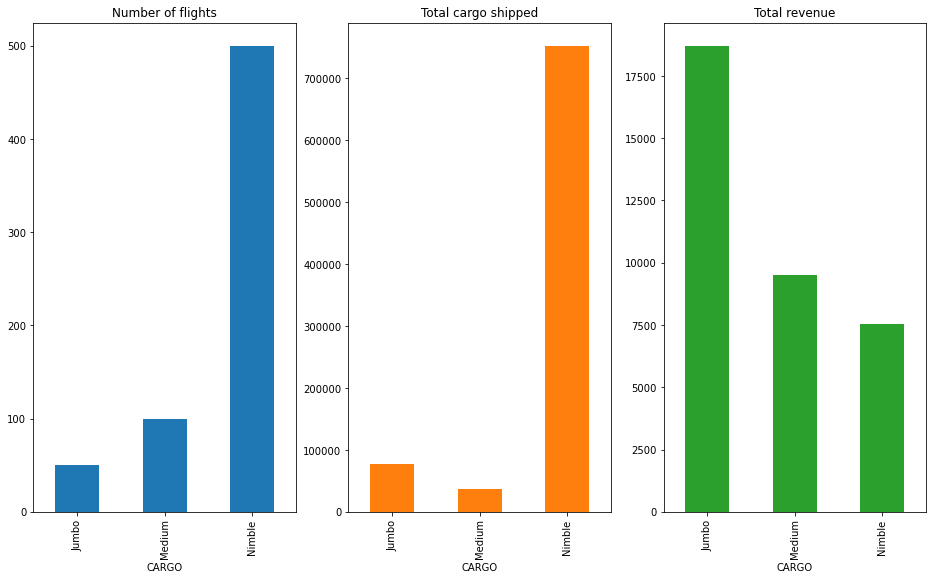

In [11]:
ax = company_list.plot(kind='bar', subplots=True,
legend=False, title=['Number of flights', 'Total cargo shipped', 'Total revenue'], layout=(1,3), figsize=(16,9))

# Задание 3

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
departament_data = pd.read_excel('students_info.xlsx')
ejudge_datas = pd.read_html('results_ejudge.html')
ejudge_data = ejudge_datas[0]
m = pd.merge(departament_data, ejudge_data, left_on='login', right_on='User')
departament_groups = m.loc[:, ['group_faculty', 'Solved']].groupby('group_faculty').mean()
computer_science_groups = m.loc[:, ['group_out', 'Solved']].groupby('group_out').mean()


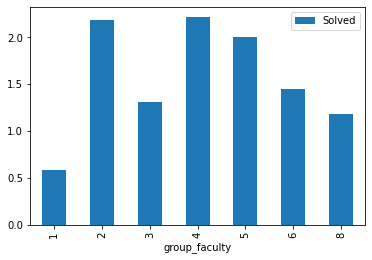

In [16]:
ax1 = departament_groups.plot(kind='bar')


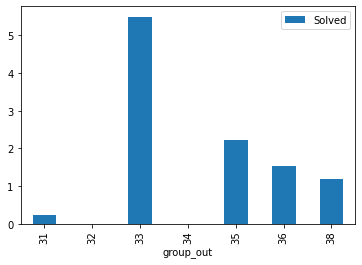

In [17]:
ax2 = computer_science_groups.plot(kind='bar')

In [18]:
clever_guys = pd.merge(m.loc[m['G'] > 9],  m.loc[m['H'] > 9], on=['login', 'group_faculty', 'group_out', 'G', 'H'], how='outer').loc[:, ['login', 'group_faculty', 'group_out', 'G', 'H']]
print(clever_guys)

       login  group_faculty  group_out     G     H
0   r0300205              2         33  30.0  49.0
1   r0300206              2         33  30.0  49.0
2   r0300508              5         33  29.0   NaN
3   r0300202              2         33   9.0  10.0
4   r0300209              2         33   0.0  30.0
5   r0300212              2         36   NaN  20.0
6   r0300301              3         35   8.0  23.0
7   r0300314              3         33   9.0  20.0
8   r0300414              4         33   NaN  15.0
9   r0300511              5         35   NaN  29.0
10  r0300514              5         33   NaN  30.0
11  r0300515              5         35   NaN  25.0
